In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set()
from scipy.stats import skew

In [2]:
raw=pd.read_csv('train.csv')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [4]:
raw.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
raw.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
raw.MSSubClass.unique().shape

(15,)

([<matplotlib.axis.XTick at 0x1cc1e7de8e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

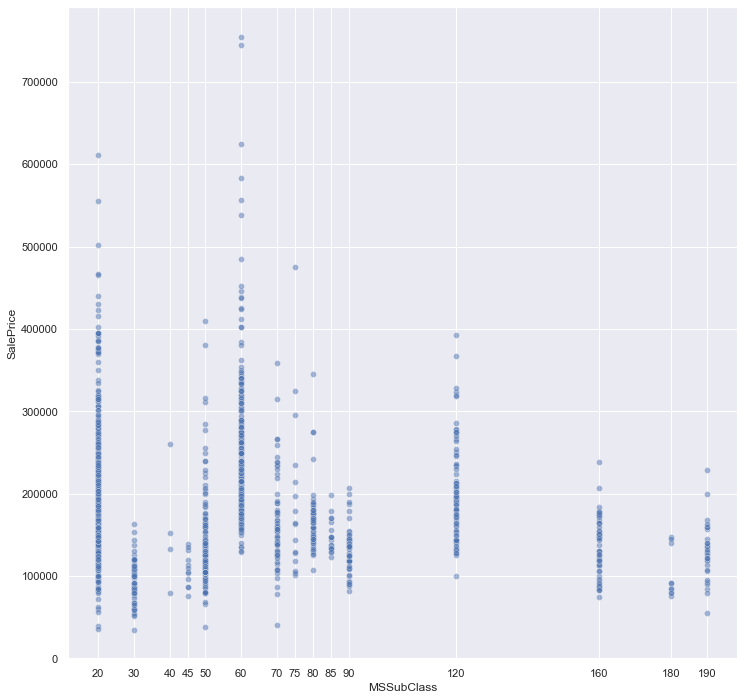

In [8]:
fig,ax=plt.subplots(figsize=(12,12))
sns.scatterplot(x=raw.MSSubClass,y=raw.SalePrice,alpha=0.5,x_bins=15)
plt.xticks(raw.MSSubClass.unique())

In [9]:
corr_matrix=raw.corr()

In [10]:
corr_matrix.style.background_gradient(cmap='PuBu',)

In [11]:
corr_matrix[corr_matrix>=0.7]=1
corr_matrix[corr_matrix<=(-0.7)]=1
corr_matrix[(corr_matrix<0.7)&(corr_matrix>-0.7)]=0



In [12]:
corr_matrix.style.background_gradient(cmap='PuBu',)

As it seems, there are a few correlations that are extremely high(>=0.7). This would result in collinearity which we would want to avoid in all circumstances. Some high collinearities are between:
1) GarageYrBlt and YearBuilt
2) TotalBsmtSF and 1stFlrSF
3) GrLivArea and TotRmsAbvGrd
4) GarageCars and GarageArea	
In the first case, it makes sense that the garage was built the same year the house was built. 

In the second case, a well structured house would have the same surface area for each floor

In the third case, the more the living area the likely bigger the house and hence the more number of rooms

In the fourth case it is fairly obvious that the number of cars in the garage would be equivivalent to the garage space

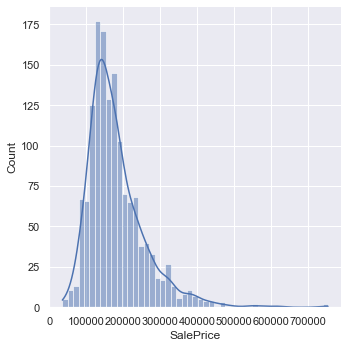

In [13]:
sns.displot(raw['SalePrice'],kde=True)

In [14]:
int_part=raw.select_dtypes(include='int64')

In [15]:
int_part

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0             2003         706           0        150          856       856   
1             1976         978           0        284         1262      1262   
2             2002         486           0        434          920       920   
3             1970         216           0        540          756       961   
4             2000         655           0        490         1145      1145   
...            ...         ...         ...        ...          ...       ...   
1455          2000           0           0        953          953       953   
1456          1988         790         163        589         1542      2073   
1457          2006         275           0        877         1152      1188   
1458          1996          49        1029          0         1078      1078   
1459          1965         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1455       694             0       1647             0             0         2   
1456         0             0       2073             1             0         2   
1457      1152             0       2340             0             0         2   
1458         0             0       1078             1             0         1   
1459         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1455         1             3             1             7           1   
1456         0             3             1             7           2   
1457         0             4             1             9           2   
1458         0             2             1             5           0   
1459         1             3             1             6           0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35   

In [16]:
int_part.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
def graphs(col_name):
    sns.scatterplot(x=raw[col_name],y=raw.SalePrice,alpha=0.7,hue=raw.OverallQual,
                    palette=sns.color_palette("viridis", as_cmap=True))
    plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1),title='Overall Quality')
    plt.xticks(rotation=90)
    plt.show()
    

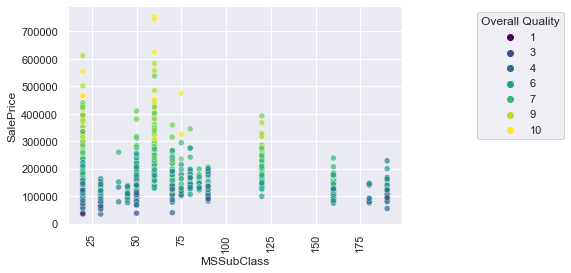

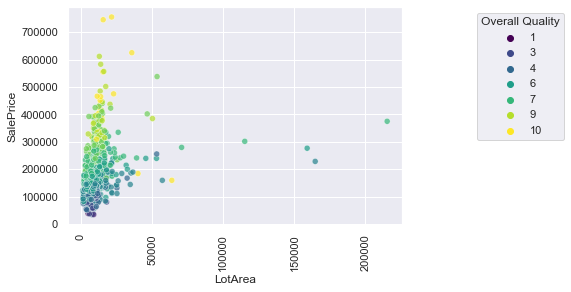

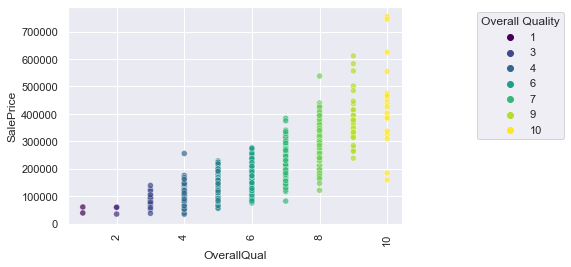

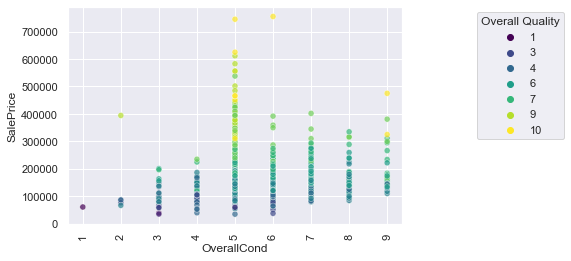

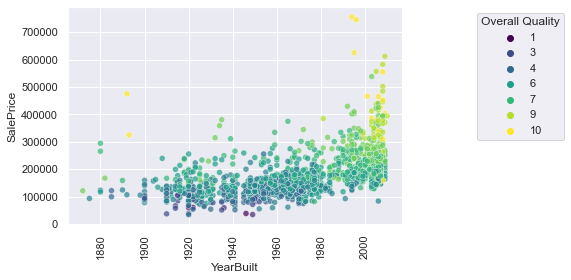

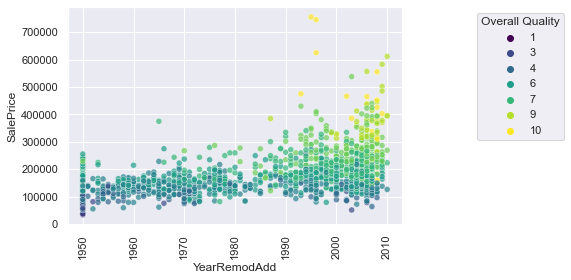

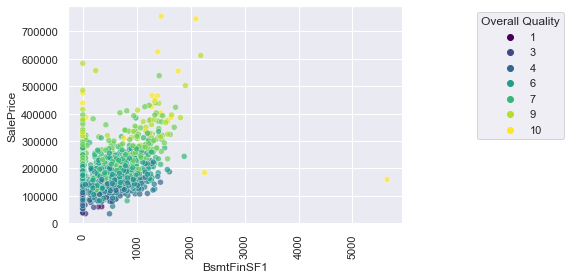

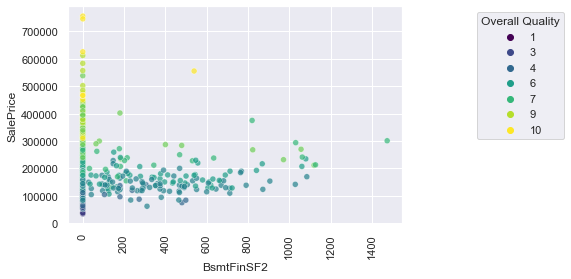

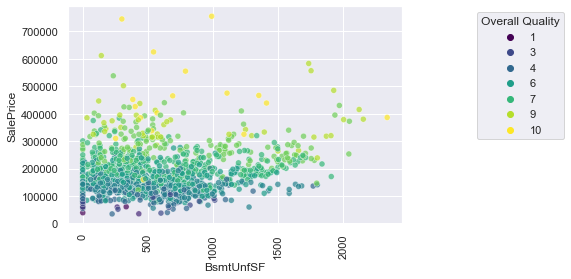

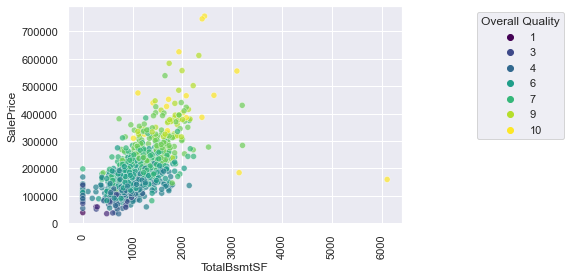

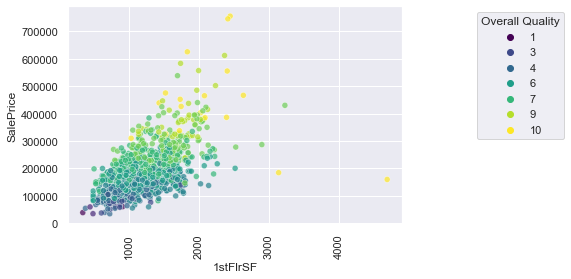

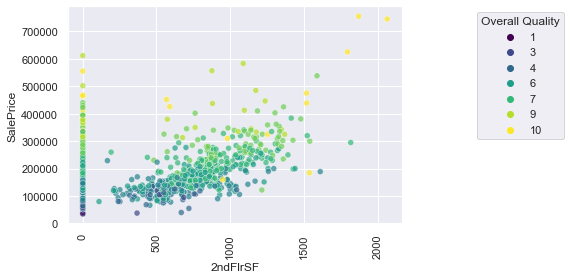

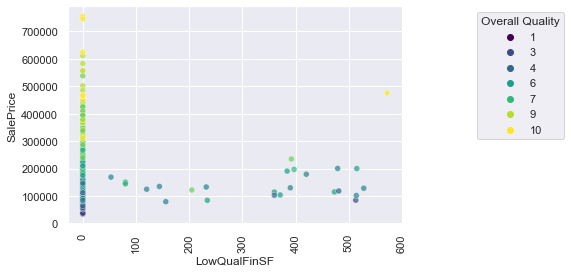

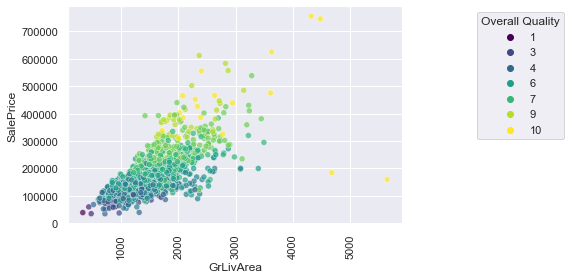

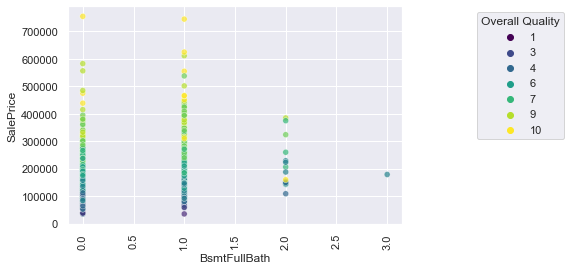

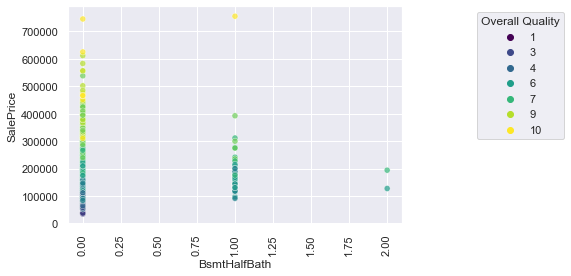

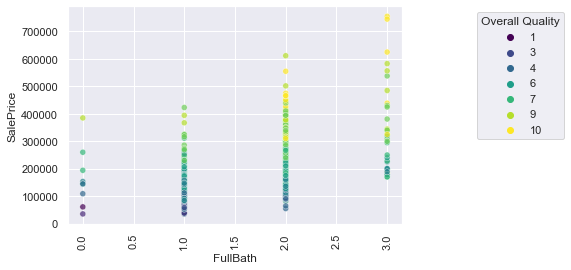

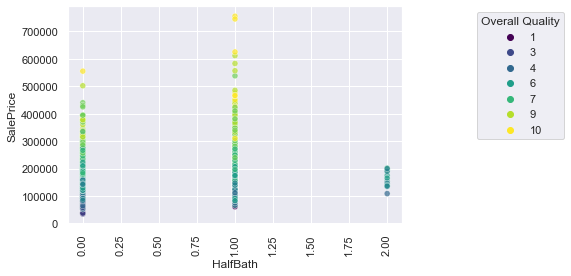

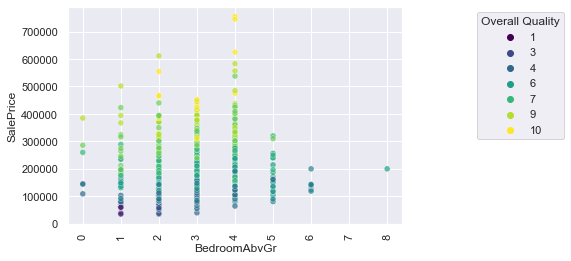

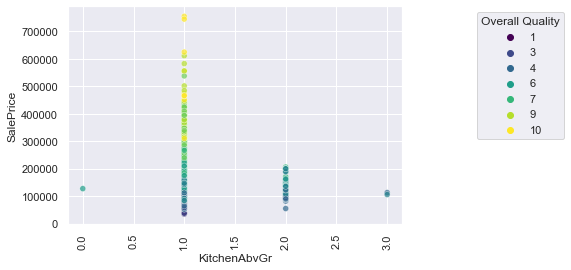

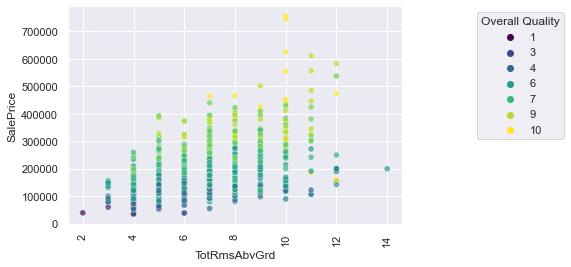

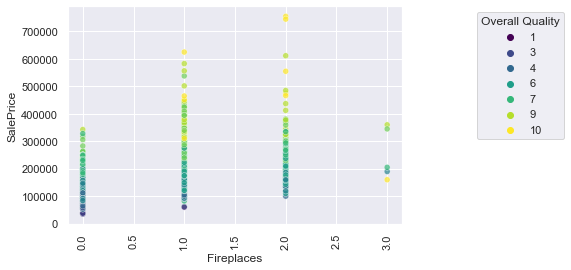

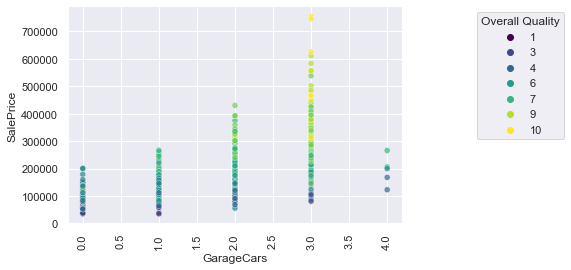

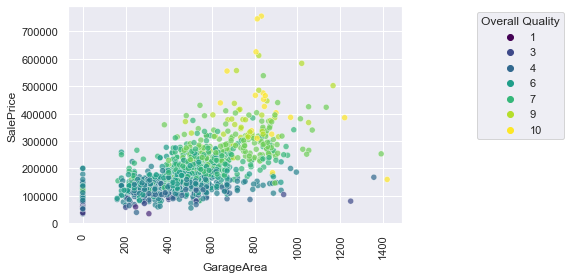

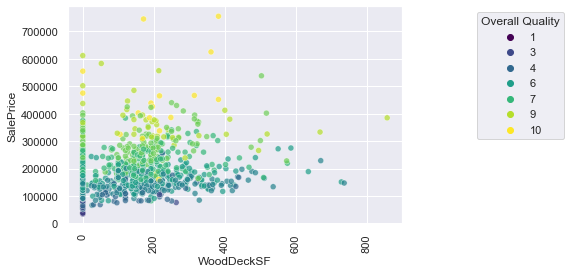

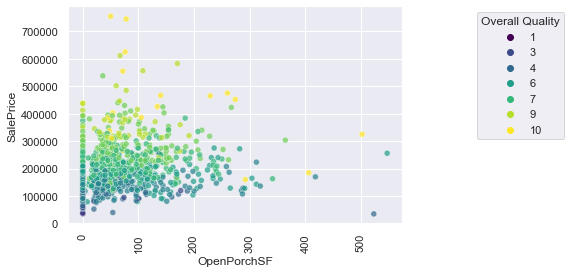

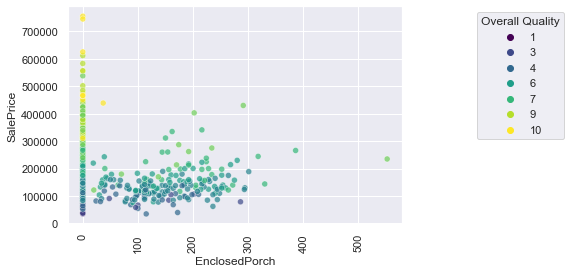

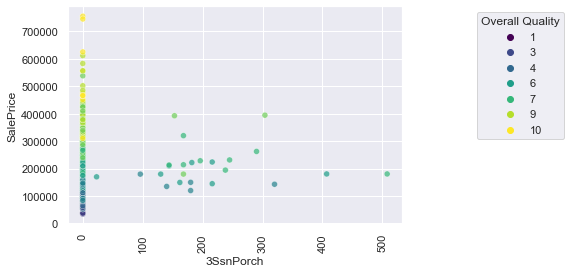

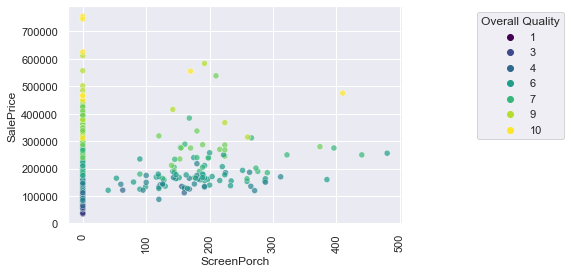

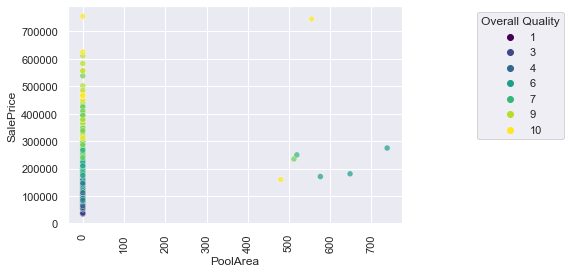

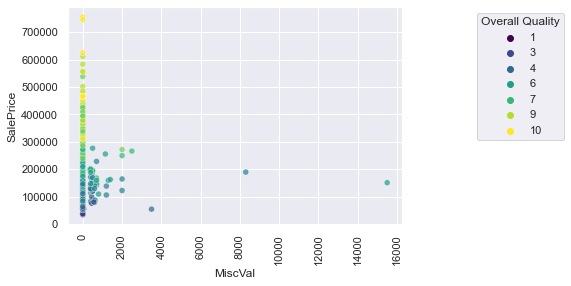

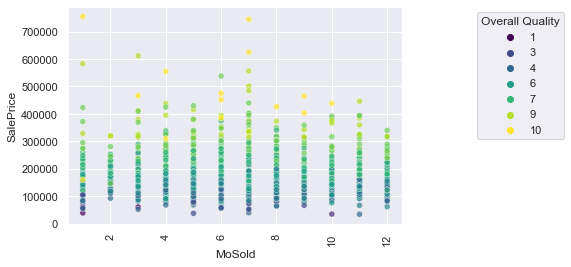

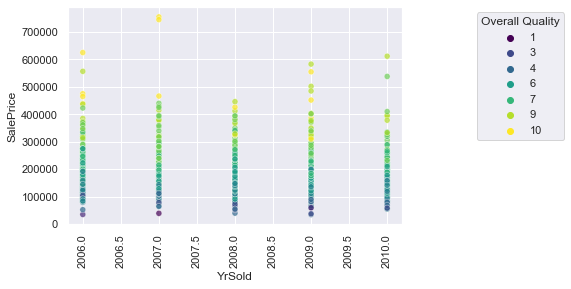

In [18]:
for i in range (1,len(int_part.columns)-1):
    graphs(int_part.columns[i])
    

In [19]:
len(int_part.columns)

35

In [20]:
int_part.columns[1]

'MSSubClass'

In [21]:
float_part=raw.select_dtypes(include='float64')

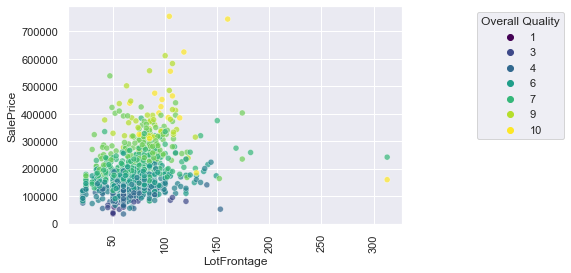

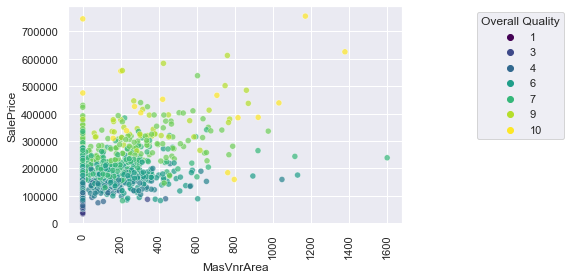

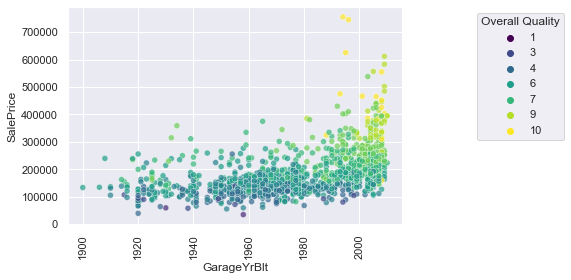

In [22]:
for i in range (0,len(float_part.columns)):
    graphs(float_part.columns[i])
    

In [23]:
object_part=raw.select_dtypes(include='object')

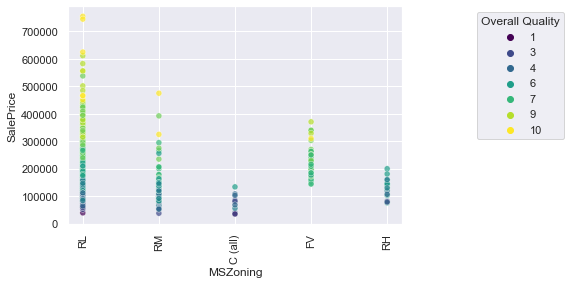

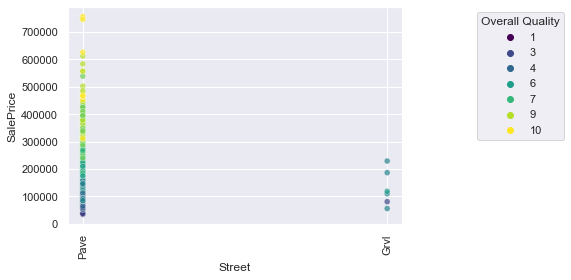

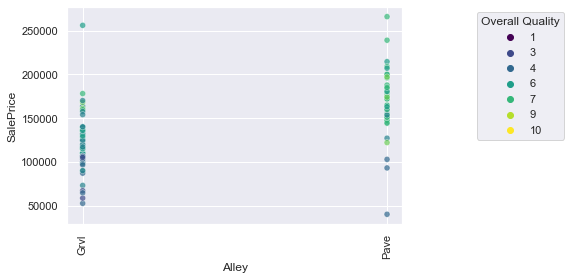

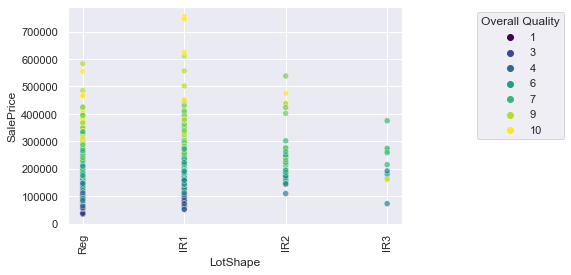

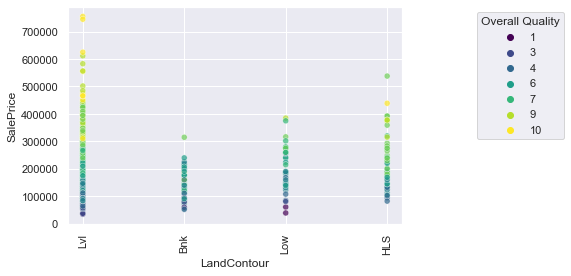

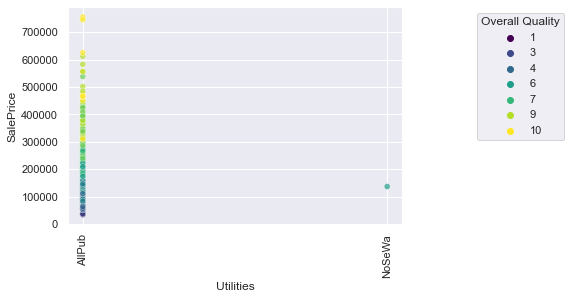

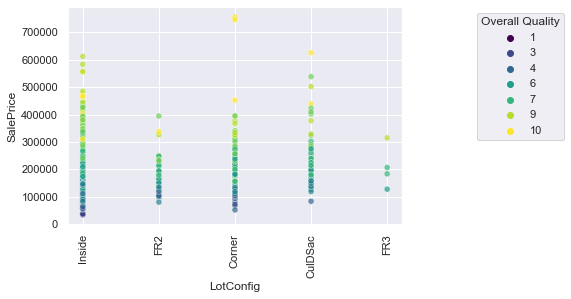

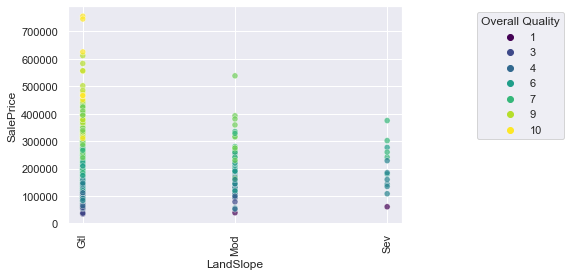

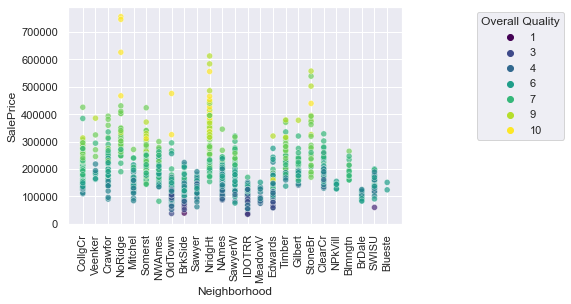

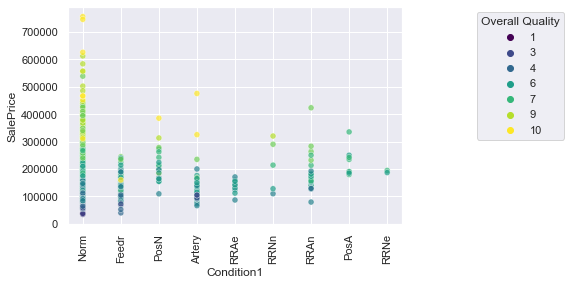

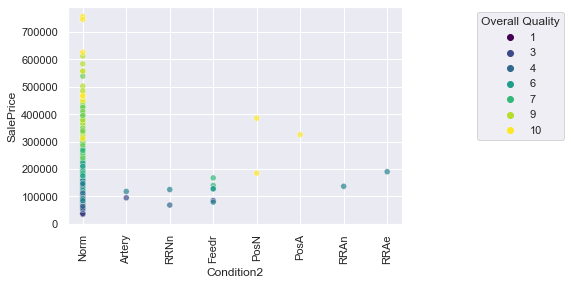

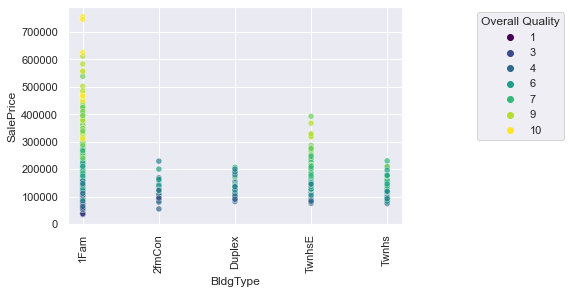

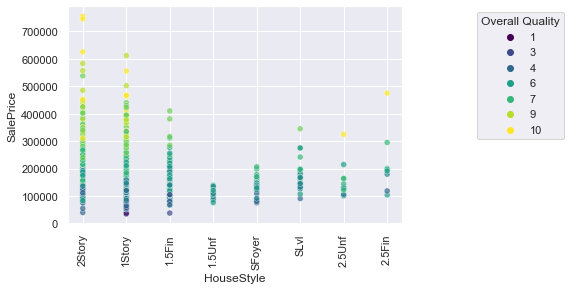

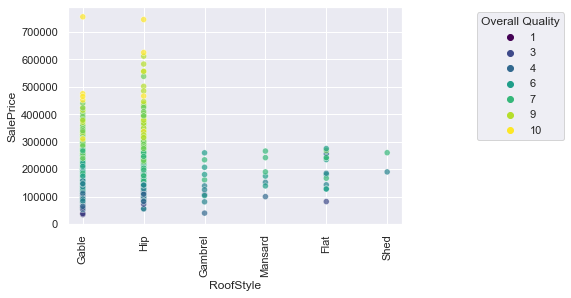

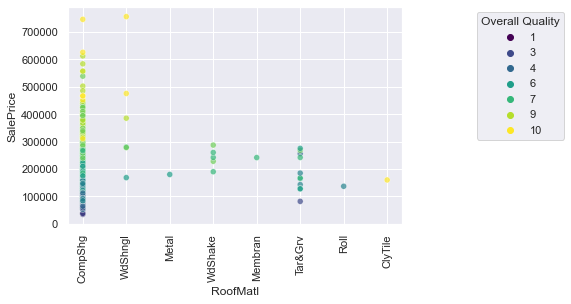

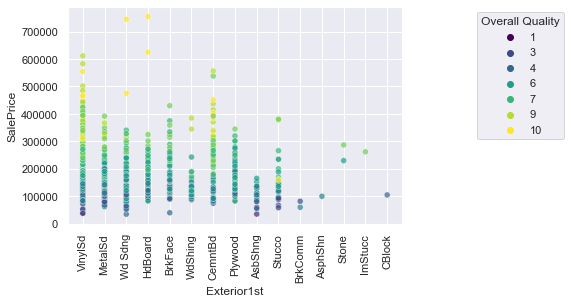

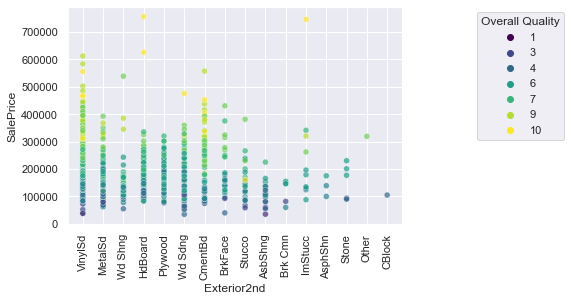

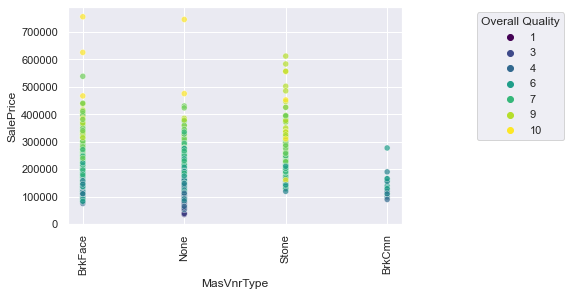

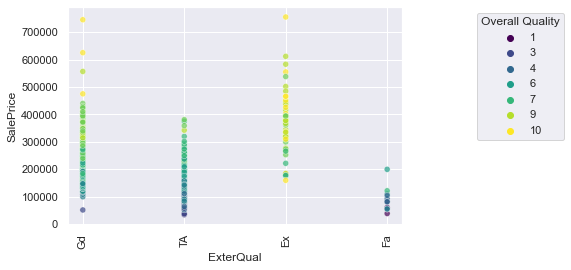

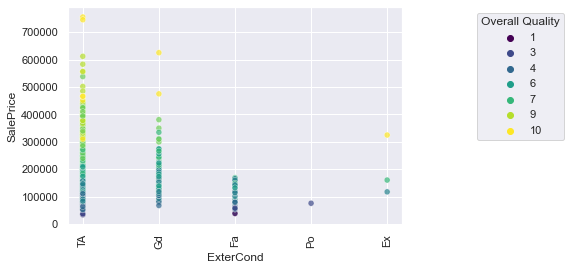

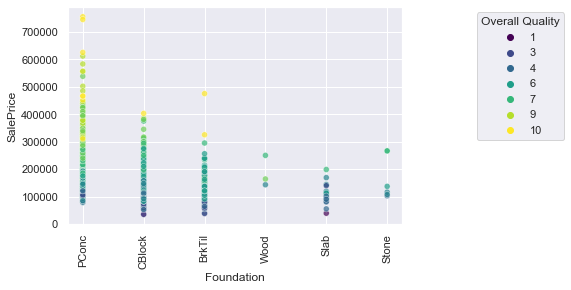

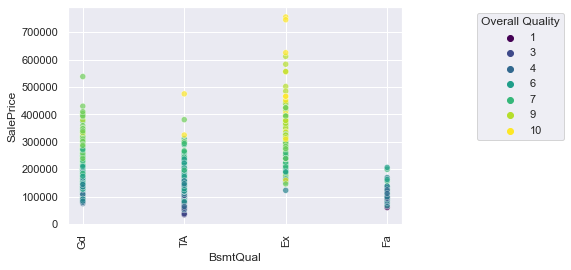

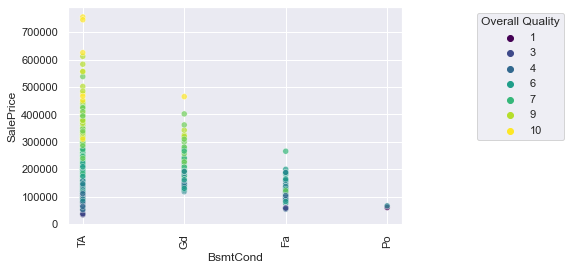

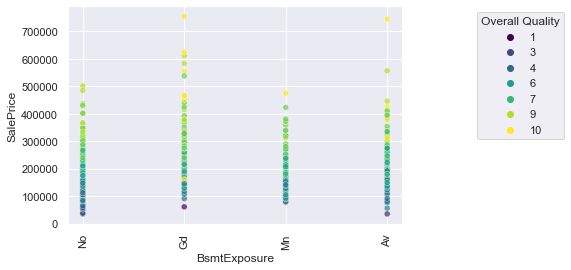

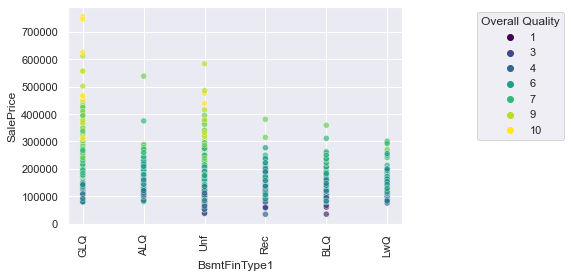

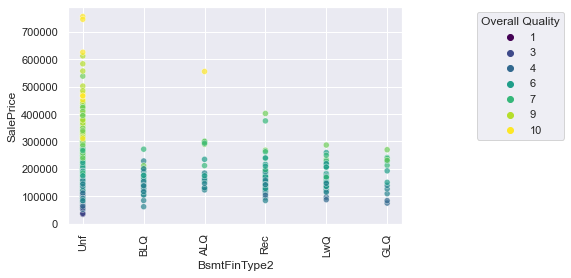

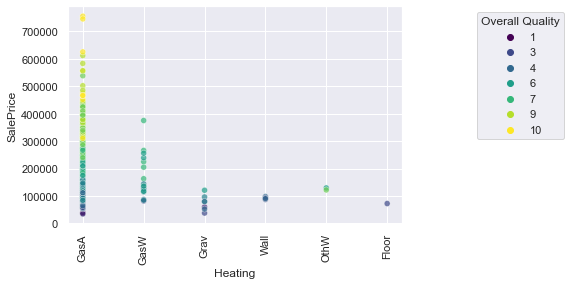

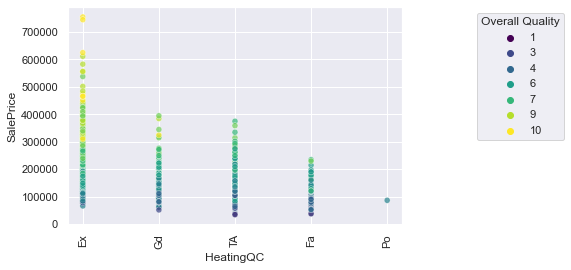

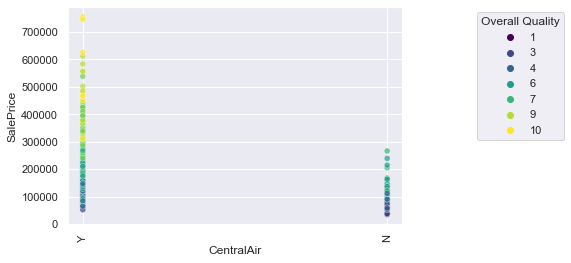

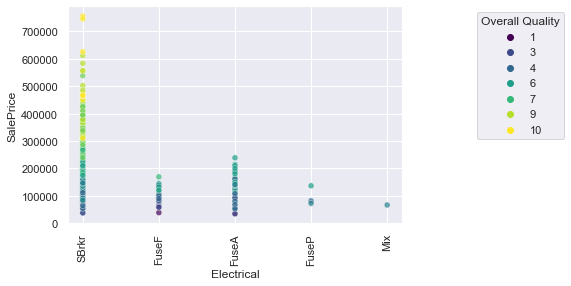

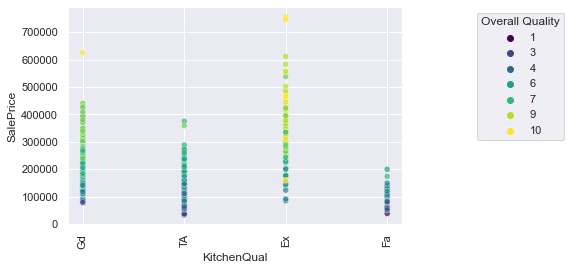

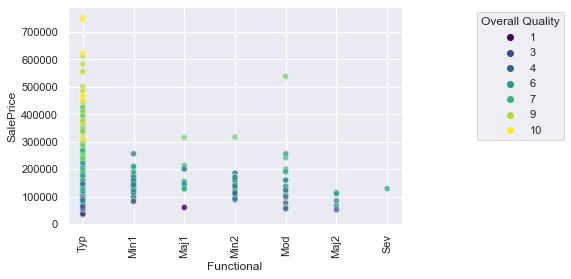

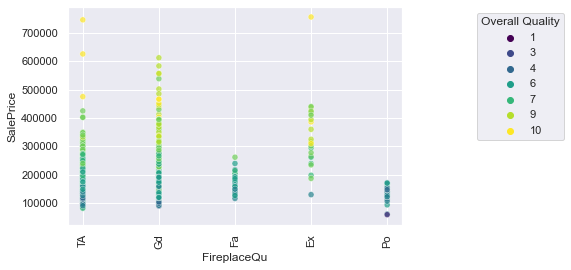

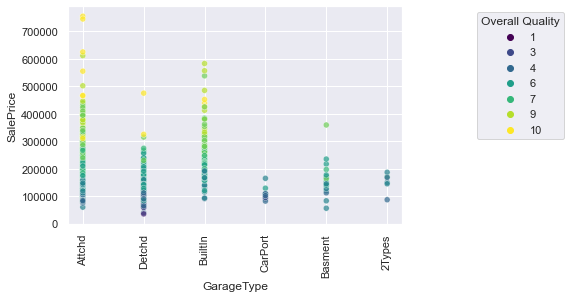

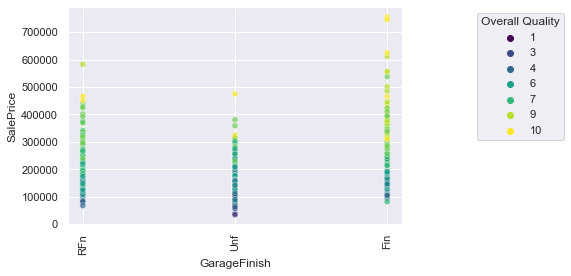

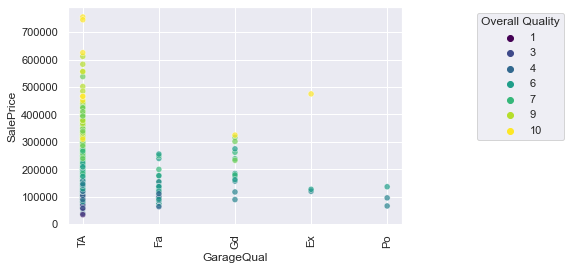

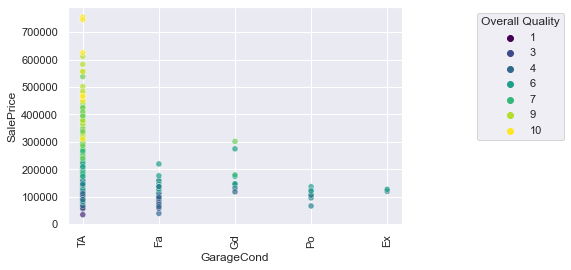

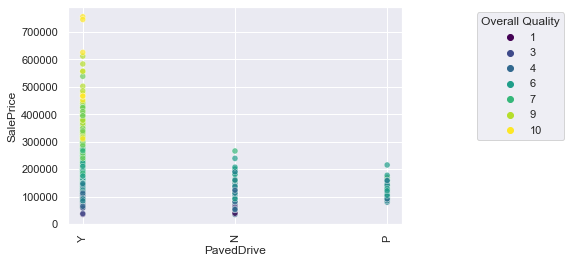

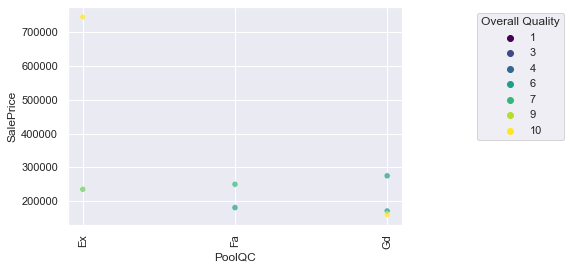

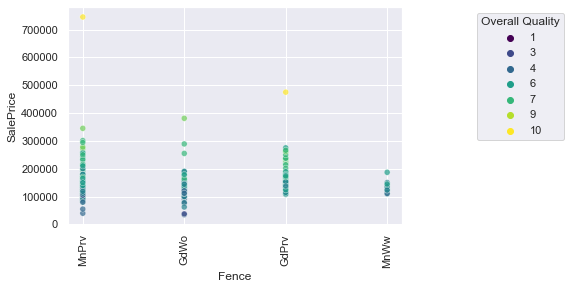

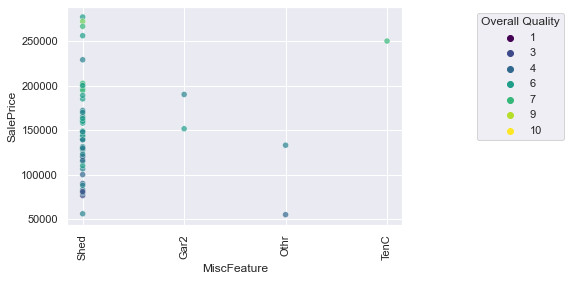

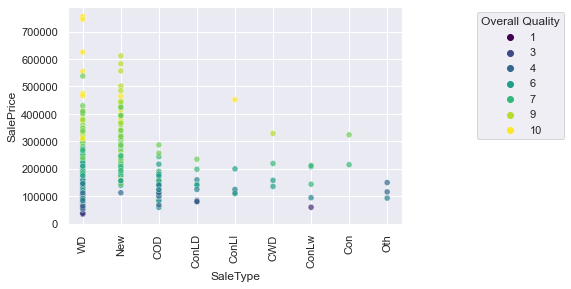

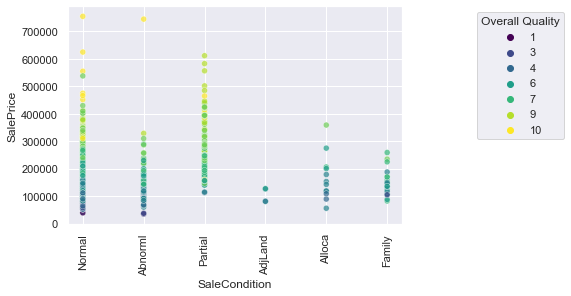

In [24]:
for i in range (0,len(object_part.columns)):
    graphs(object_part.columns[i])

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

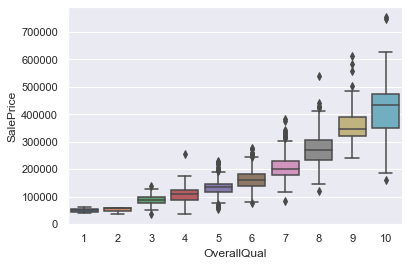

In [25]:
sns.boxplot(x=raw.OverallQual,y=raw.SalePrice)

In [26]:
test=pd.read_csv('test.csv')

In [27]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [28]:
raw.drop(raw[(raw.GrLivArea>4000)&(raw.SalePrice<300000)].index,inplace=True)
raw.drop(raw[raw.BsmtFinSF1>5000].index,inplace=True)

In [29]:
raw.reset_index(drop=True,inplace=True)

In [30]:
df=pd.concat([raw,test],axis=0)

In [31]:
df.shape

(2917, 81)

In [32]:
test.shape

(1459, 80)

In [33]:
null_val=pd.DataFrame(df.isnull().sum().mul(100).div(2917),columns=['NullValues'])

In [34]:
null_val.sort_values(by='NullValues',ascending=False,inplace=True)

In [35]:
null_val

NullValues
PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
SalePrice       50.017141
FireplaceQu     48.680151
LotFrontage     16.660953
GarageFinish     5.450806
GarageQual       5.450806
GarageCond       5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
Functional       0.068564
BsmtHalfBath     0.068564
BsmtFullBath     0.068564
Utilities        0.068564
BsmtFinSF1       0.034282
BsmtFinSF2       0.034282
SaleType         0.034282
Electrical       0.034282
GarageCars       0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
Exterior2nd      0.034282
Exterior1st      0.034282
KitchenQual      0.034282
BsmtUnfSF        0.034282
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
SaleCondition    0.000000
OpenPorchSF      0.000000
YrSold           0.000000
WoodDeckSF       0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BedroomAbvGr     0.000000
3SsnPorch        0.000000
EnclosedPorch    0.000000
PavedDrive       0.000000
KitchenAbvGr     0.000000
Id               0.000000
HalfBath         0.000000
FullBath         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
Heating          0.000000
MSSubClass       0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
HeatingQC        0.000000

In [36]:
raw.shape

(1458, 81)

In [37]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       247
BrkCmn       25
Name: MasVnrType, dtype: int64

In [38]:
df.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [39]:
df.Functional.value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [40]:
df.BsmtHalfBath.value_counts()

0.0    2740
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [41]:
df.BsmtFullBath.value_counts()

0.0    1705
1.0    1171
2.0      37
3.0       2
Name: BsmtFullBath, dtype: int64

In [42]:
df.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [43]:
df.SaleType.value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [44]:
df.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [45]:
df.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [46]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [47]:
df.MSZoning.mode()

0    RL
dtype: object

In [48]:
df.PoolQC.fillna('No Pool',inplace=True)
df.MiscFeature.fillna('No Misc',inplace=True)
df.Alley.fillna('No Alley',inplace=True)
df.Fence.fillna('No Fence',inplace=True)
df.FireplaceQu.fillna('No Fireplace',inplace=True)
df.GarageFinish.fillna('No Garage',inplace=True)
df.GarageQual.fillna('No Garage',inplace=True)
df.GarageCond.fillna('No Garage',inplace=True)
df.GarageType.fillna('No Garage',inplace=True)
df.GarageYrBlt.fillna(0,inplace=True)
df.BsmtCond.fillna('No Basement',inplace=True)
df.BsmtExposure.fillna('No Basement',inplace=True)
df.BsmtQual.fillna('No Basement',inplace=True)
df.BsmtFinType1.fillna('No Basement',inplace=True)
df.BsmtFinType2.fillna('No Basement',inplace=True)
df.MasVnrType.fillna('No Masonry',inplace=True)
df.MasVnrArea.fillna(0,inplace=True)
df.Functional.fillna('Typ',inplace=True)
df.BsmtHalfBath.fillna(0,inplace=True)
df.BsmtFullBath.fillna(0,inplace=True)
df.Utilities.fillna('AllPub',inplace=True)
df.BsmtFinSF1.fillna(0,inplace=True)
df.BsmtFinSF2.fillna(0,inplace=True)
df.SaleType.fillna('WD',inplace=True)
df.Electrical.fillna('SBrkr',inplace=True)
df.GarageCars.fillna(0,inplace=True)
df.TotalBsmtSF.fillna(0,inplace=True)
df.GarageArea.fillna(0,inplace=True)
df.Exterior2nd.fillna('VinylSd',inplace=True)
df.Exterior1st.fillna('VinylSd',inplace=True)
df.KitchenQual.fillna('TA',inplace=True)
df.BsmtUnfSF.fillna(0,inplace=True)
df['LotFrontage']= df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
df.MSZoning.fillna('RL',inplace=True)

In [49]:
df['YearDiff']=df.YrSold-df.YearBuilt

In [50]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [51]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [52]:
columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'YearDiff', 'TotalSF', 'SalePrice']
df=df[columns]

In [53]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
0        1          60       RL         65.0     8450   Pave  No Alley   
1        2          20       RL         80.0     9600   Pave  No Alley   
2        3          60       RL         68.0    11250   Pave  No Alley   
3        4          70       RL         60.0     9550   Pave  No Alley   
4        5          60       RL         84.0    14260   Pave  No Alley   
...    ...         ...      ...          ...      ...    ...       ...   
1454  2915         160       RM         21.0     1936   Pave  No Alley   
1455  2916         160       RM         21.0     1894   Pave  No Alley   
1456  2917          20       RL        160.0    20000   Pave  No Alley   
1457  2918          85       RL         62.0    10441   Pave  No Alley   
1458  2919          60       RL         74.0     9627   Pave  No Alley   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0         Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1         Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2         IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3         IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4         IR1         Lvl    AllPub       FR2       Gtl      NoRidge   
...       ...         ...       ...       ...       ...          ...   
1454      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1455      Reg         Lvl    AllPub    Inside       Gtl      MeadowV   
1456      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1457      Reg         Lvl    AllPub    Inside       Gtl      Mitchel   
1458      Reg         Lvl    AllPub    Inside       Mod      Mitchel   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1454       Norm       Norm    Twnhs     2Story            4            7   
1455       Norm       Norm   TwnhsE     2Story            4            5   
1456       Norm       Norm     1Fam     1Story            5            7   
1457       Norm       Norm     1Fam     SFoyer            5            5   
1458       Norm       Norm     1Fam     2Story            7            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1454       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1455       1970          1970     Gable  CompShg     CemntBd     CmentBd   
1456       1960          1996     Gable  CompShg     VinylSd     VinylSd   
1457       1992          1992     Gable  CompShg     HdBoard     Wd Shng   
1458       1993          1994     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0 

In [54]:
numerical_columns=[ 'LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea',  'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold','YrSold',
       'MiscVal',  'SalePrice']

In [55]:
def histgram(col_name):
    sns.displot(df[col_name],kde=True)
    sk=df.skew()[col_name]
    plt.title(col_name+' Skew = {:.4f}'.format(sk))
    plt.ylabel('Frequency')

C:\Users\Manisha-Hitesh\anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


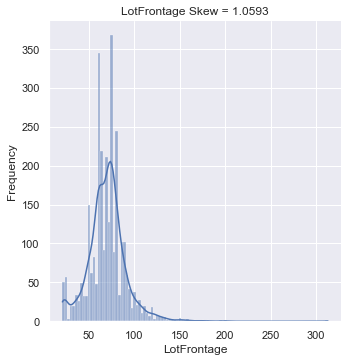

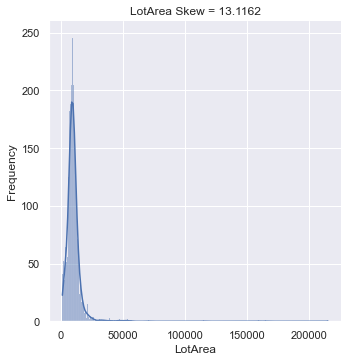

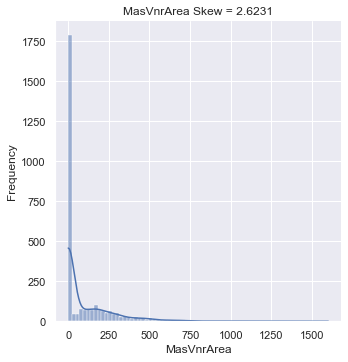

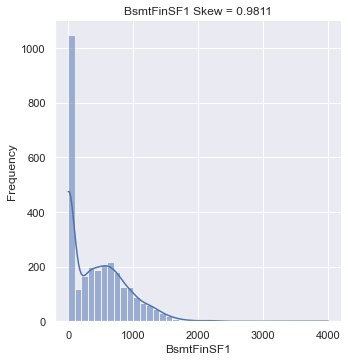

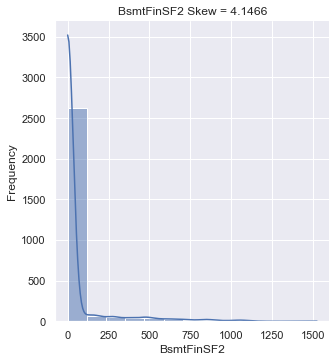

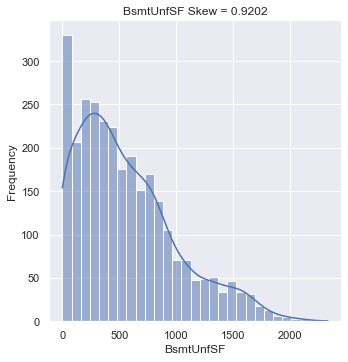

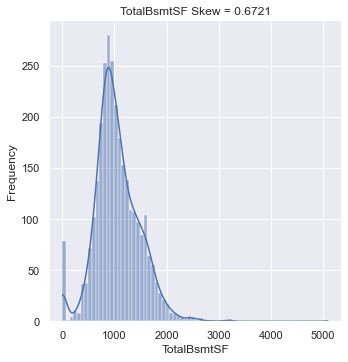

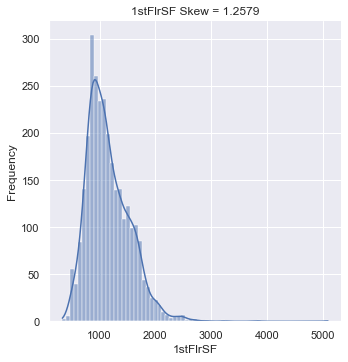

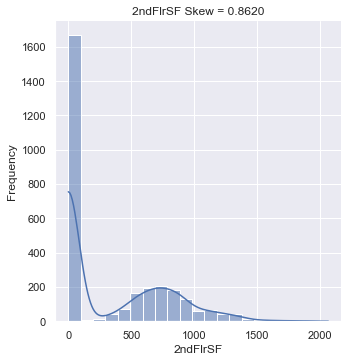

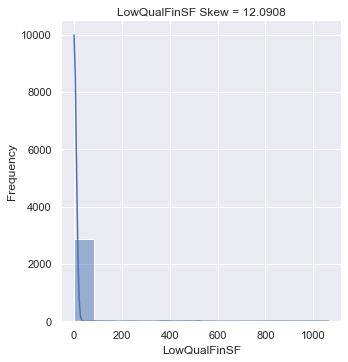

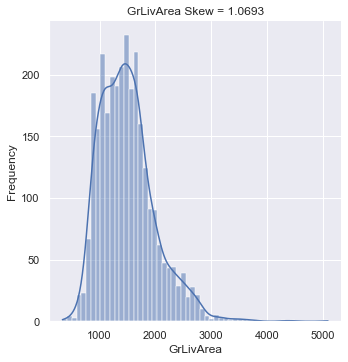

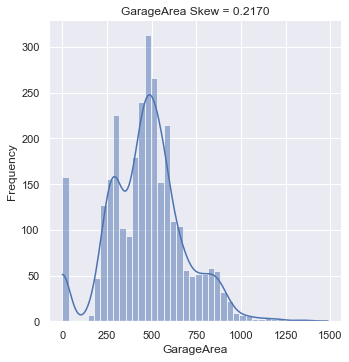

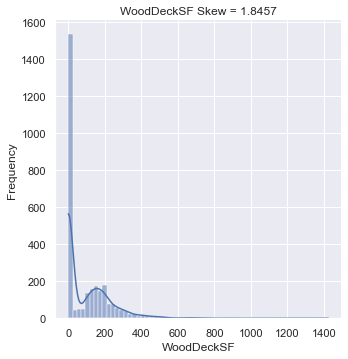

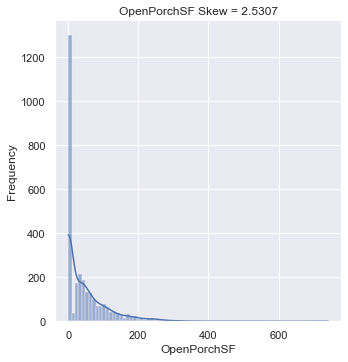

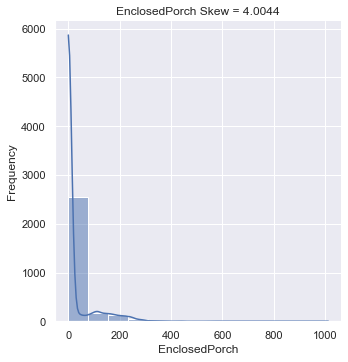

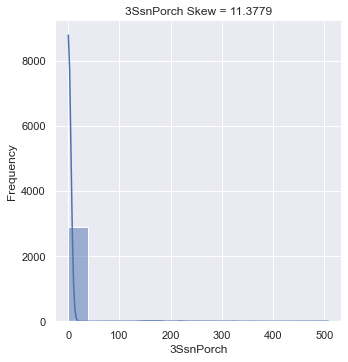

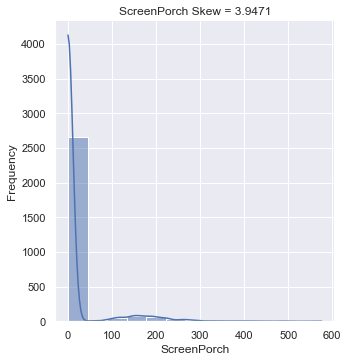

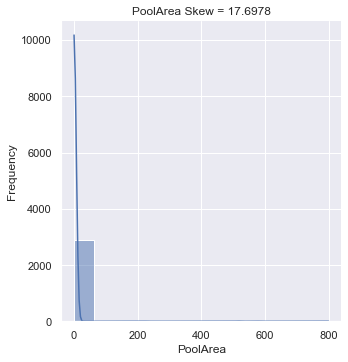

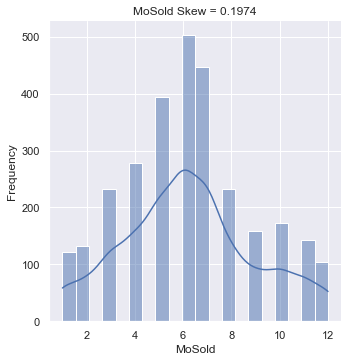

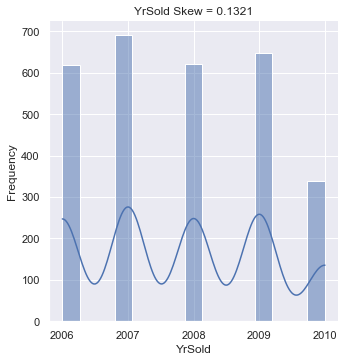

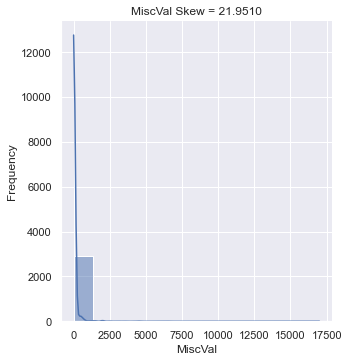

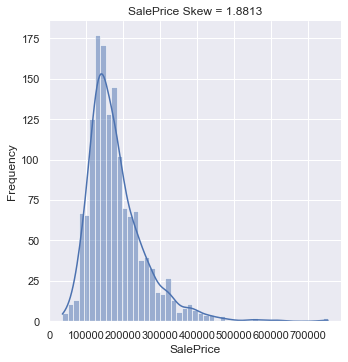

In [56]:

for i in range (0,len(numerical_columns)):
    histgram(numerical_columns[i])

In [57]:
df.drop(['PoolArea'],axis=1,inplace=True)

In [58]:
df.SalePrice=np.log1p(df.SalePrice)
skewness=df.skew()
skewness=skewness[abs(skewness)>0.5]

In [59]:
skewness

MSSubClass        1.375838
LotFrontage       1.059348
LotArea          13.116240
OverallCond       0.569607
YearBuilt        -0.599503
MasVnrArea        2.623068
BsmtFinSF1        0.981149
BsmtFinSF2        4.146636
BsmtUnfSF         0.920161
TotalBsmtSF       0.672097
1stFlrSF          1.257933
2ndFlrSF          0.861999
LowQualFinSF     12.090757
GrLivArea         1.069300
BsmtFullBath      0.622735
BsmtHalfBath      3.932018
HalfBath          0.697024
KitchenAbvGr      4.302763
TotRmsAbvGrd      0.749618
Fireplaces        0.725651
GarageYrBlt      -3.906642
WoodDeckSF        1.845741
OpenPorchSF       2.530660
EnclosedPorch     4.004404
3SsnPorch        11.377932
ScreenPorch       3.947131
MiscVal          21.950962
YearDiff          0.598323
TotalSF           1.009676
dtype: float64

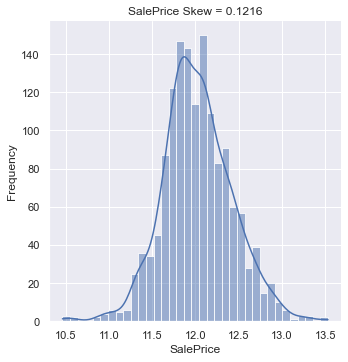

In [60]:
histgram('SalePrice')

In [61]:
df.MSSubClass=df.MSSubClass.astype('str')

In [62]:
categorical_columns=[]
for c in df.columns:
    if c not in numerical_columns:
        categorical_columns.append(c)

categorical_columns=categorical_columns[1:]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in categorical_columns:
    df[c]=le.fit_transform(df[c])
    

In [63]:
from scipy.special import boxcox1p
skewed_features = skewness.index

for feat in skewed_features:
    
    df[feat] = boxcox1p(df[feat], 0.25)

df=pd.get_dummies(df,drop_first=True)

In [64]:
train=df[df.SalePrice.isna()==False]

In [65]:
test=df[df.SalePrice.isna()]

In [66]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [67]:
test.head()

Id  MSSubClass  MSZoning  LotFrontage    LotArea  Street  Alley  \
0  1461    2.260338         2     8.000000  37.532641       1      1   
1  1462    2.260338         3     8.036867  39.717042       1      1   
2  1463    3.284641         3     7.771324  39.378386       1      1   
3  1464    3.284641         3     7.925230  35.978983       1      1   
4  1465    0.000000         3     6.302038  29.645943       1      1   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0         3            3          0          4          0            12   
1         0            3          0          0          0            12   
2         0            3          0          4          0             8   
3         0            3          0          4          0             8   
4         0            1          0          4          0            22   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0           1           2         0           2            4     2.260338   
1           2           2         0           2            5     2.260338   
2           2           2         0           5            4     1.981395   
3           2           2         0           5            5     2.260338   
4           2           2         4           2            7     1.981395   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   7.528486            11          1         0           12           13   
1   7.401080             8          3         0           13           14   
2   8.804343            48          1         0           12           13   
3   8.834722            48          1         0           12           13   
4   8.649111            42          1         0            6            6   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0           3    0.000000          3          4           1         4   
1           1    8.924585          3          4           1         4   
2           3    0.000000          3          4           2         2   
3           1    4.562781          3          4           2         4   
4           3    0.000000          2          4           2         2   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0         4             3             5   14.614578             3      9.8804   
1         4             3             0   18.053523             6      0.0000   
2         4             3             2   17.219800             6      0.0000   
3         4             3             2   15.821628             6      0.0000   
4         4             3             0   12.123561             6      0.0000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0  12.229394    17.804703        1          4           1           4   
1  13.966298    20.155882        1          4           1           4   
2   9.709757    18.083297        1          2           1           4   
3  12.983642    18.071402        1          0           1           4   
4  18.594198    19.930252        1          0           1           4   

    1stFlrSF   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  17.890622   0.000000           0.0  17.890622           0.0           0.0   
1  20.155882   0.000000           0.0  20.155882           0.0           0.0   
2  18.083297  16.589427           0.0  21.415982           0.0           0.0   
3  18.071402  16.418669           0.0  21.317962           0.0           0.0   
4  19.930252   0.000000           0.0  19.930252           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1  0.000000             2      0.756828            3      1.656854   
1         1  0.756828             3      0.756828            2      1.981395   
2         2  0.756828             3      0.756828            3      1.981395   
3         2  0.756828        

In [68]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVR
from sklearn.preprocessing import RobustScaler

In [69]:
x_train=train.iloc[:,1:-1]

In [70]:
y_train=train.iloc[:,-1]

In [71]:
svr=make_pipeline(RobustScaler(),LinearSVR(random_state=1,max_iter=10000,dual=False,loss='squared_epsilon_insensitive'))

In [72]:
scores=pd.DataFrame(columns=('Model','RMSE'))
scores.loc[len(scores)]=['SVR',rmsle_cv(svr).mean()]

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
regressor=RandomForestRegressor(n_estimators=2750,min_samples_split=2,min_samples_leaf=1,max_depth=9,max_features='sqrt',
                                random_state=20)

In [75]:
score=rmsle_cv(regressor)

In [76]:
score.mean()

0.13804769333124484

In [77]:
scores.loc[len(scores)]=['Random Forest',score.mean()]

In [78]:
import xgboost as xgb
import lightgbm as lgb

In [79]:
xboost=xgb.XGBRegressor(colsample_bytree =0.3, gamma =0.0, learning_rate= 0.02, max_depth= 13,
                        min_child_weight= 7, n_estimators= 900, reg_alpha= 0.24377460116564242, reg_lambda= 0.8195285095209887,
                        subsample= 0.9521647837842138)

In [80]:
scores.loc[len(scores)]=['XGBoost',rmsle_cv(xboost).mean()]

In [81]:
from sklearn.metrics import mean_squared_error as mse



In [82]:
lgbm=lgb.LGBMRegressor(feature_fraction= 0.42,learning_rate=0.05,max_bin= 1127,max_depth= 5,
                       min_child_weight= 20.19, n_estimators= 2200, num_leaves= 38, subsample= 0.772,
                       reg_alpha=0.119,reg_lambda=0.73 )

In [83]:
from sklearn.linear_model import ElasticNet, Lasso


In [84]:
lasso =  make_pipeline(RobustScaler(),Lasso(alpha =0.0005, random_state=1))

In [85]:
scores.loc[len(scores)]=['Lasso',rmsle_cv(lasso).mean()]
enet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005, l1_ratio=.83, random_state=3))
scores.loc[len(scores)]=['ElasticNet',rmsle_cv(enet).mean()]

In [86]:
scores.loc[len(scores)]=['LGBM',rmsle_cv(lgbm).mean()]

[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42


In [87]:
from sklearn.ensemble import StackingRegressor

In [88]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor)])

In [89]:
scores.loc[len(scores)]=['SVR+RF',rmsle_cv(sr).mean()]

In [90]:
scores

Model      RMSE
0            SVR  0.127830
1  Random Forest  0.138048
2        XGBoost  0.116288
3          Lasso  0.120048
4     ElasticNet  0.120079
5           LGBM  0.121907
6         SVR+RF  0.119764

In [91]:
import lightgbm as lgb

In [92]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('XGBoost',xboost)])

In [93]:
scores.loc[len(scores)]=['SVR+RF+XGB',rmsle_cv(sr).mean()]

In [94]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('XGBoost',xboost),('LGBM',lgbm)])
scores.loc[len(scores)]=['SVR+RF+XGB+LGBM',rmsle_cv(sr).mean()]

[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42
[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fracti

In [95]:
scores

Model      RMSE
0              SVR  0.127830
1    Random Forest  0.138048
2          XGBoost  0.116288
3            Lasso  0.120048
4       ElasticNet  0.120079
5             LGBM  0.121907
6           SVR+RF  0.119764
7       SVR+RF+XGB  0.113690
8  SVR+RF+XGB+LGBM  0.114013

In [96]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('ElasticNet',enet)],final_estimator=lasso)
scores.loc[len(scores)]=['SVR+RF+ENET+LASSO(fin)',rmsle_cv(sr).mean()]

In [97]:
scores

Model      RMSE
0                     SVR  0.127830
1           Random Forest  0.138048
2                 XGBoost  0.116288
3                   Lasso  0.120048
4              ElasticNet  0.120079
5                    LGBM  0.121907
6                  SVR+RF  0.119764
7              SVR+RF+XGB  0.113690
8         SVR+RF+XGB+LGBM  0.114013
9  SVR+RF+ENET+LASSO(fin)  0.117277

In [98]:
sr=StackingRegressor([('SVR',svr),('ElasticNet',enet)],final_estimator=lasso)
scores.loc[len(scores)]=['SVR+ENET+LASSO(fin)',rmsle_cv(sr).mean()]

In [99]:
scores

Model      RMSE
0                      SVR  0.127830
1            Random Forest  0.138048
2                  XGBoost  0.116288
3                    Lasso  0.120048
4               ElasticNet  0.120079
5                     LGBM  0.121907
6                   SVR+RF  0.119764
7               SVR+RF+XGB  0.113690
8          SVR+RF+XGB+LGBM  0.114013
9   SVR+RF+ENET+LASSO(fin)  0.117277
10     SVR+ENET+LASSO(fin)  0.120106

In [100]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('ElasticNet',enet),('Lasso',lasso)])
scores.loc[len(scores)]=['SVR+RF+ENET+LASSO',rmsle_cv(sr).mean()]

In [101]:
sr=StackingRegressor([('SVR',svr),('ElasticNet',enet),('Lasso',lasso)])
scores.loc[len(scores)]=['SVR+ENET+LASSO',rmsle_cv(sr).mean()]

In [102]:
scores

Model      RMSE
0                      SVR  0.127830
1            Random Forest  0.138048
2                  XGBoost  0.116288
3                    Lasso  0.120048
4               ElasticNet  0.120079
5                     LGBM  0.121907
6                   SVR+RF  0.119764
7               SVR+RF+XGB  0.113690
8          SVR+RF+XGB+LGBM  0.114013
9   SVR+RF+ENET+LASSO(fin)  0.117277
10     SVR+ENET+LASSO(fin)  0.120106
11       SVR+RF+ENET+LASSO  0.117366
12          SVR+ENET+LASSO  0.120124

In [103]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [104]:
scores.loc[len(scores)]=['KR',rmsle_cv(kr).mean()]

In [105]:
sr=StackingRegressor([('SVR',svr),('ElasticNet',enet),('KernelRidge',kr)],final_estimator=lasso)
scores.loc[len(scores)]=['SVR+ENET+KR+LASSO(fin)',rmsle_cv(sr).mean()]
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('ElasticNet',enet),('KernelRidge',kr)],final_estimator=lasso)
scores.loc[len(scores)]=['SVR+RF+ENET+KR+LASSO(fin)',rmsle_cv(sr).mean()]
scores

Model      RMSE
0                         SVR  0.127830
1               Random Forest  0.138048
2                     XGBoost  0.116288
3                       Lasso  0.120048
4                  ElasticNet  0.120079
5                        LGBM  0.121907
6                      SVR+RF  0.119764
7                  SVR+RF+XGB  0.113690
8             SVR+RF+XGB+LGBM  0.114013
9      SVR+RF+ENET+LASSO(fin)  0.117277
10        SVR+ENET+LASSO(fin)  0.120106
11          SVR+RF+ENET+LASSO  0.117366
12             SVR+ENET+LASSO  0.120124
13                         KR  0.174310
14     SVR+ENET+KR+LASSO(fin)  0.118998
15  SVR+RF+ENET+KR+LASSO(fin)  0.116593

In [106]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('ElasticNet',enet),('KernelRidge',kr),('Lasso',lasso)])
scores.loc[len(scores)]=['SVR+RF+ENET+KR+LASSO',rmsle_cv(sr).mean()]

In [107]:
sr=StackingRegressor([('SVR',svr),('ElasticNet',enet),('Lasso',lasso),('KernelRidge',kr)])
scores.loc[len(scores)]=['SVR+ENET+LASSO+KR',rmsle_cv(sr).mean()]

In [108]:
scores

Model      RMSE
0                         SVR  0.127830
1               Random Forest  0.138048
2                     XGBoost  0.116288
3                       Lasso  0.120048
4                  ElasticNet  0.120079
5                        LGBM  0.121907
6                      SVR+RF  0.119764
7                  SVR+RF+XGB  0.113690
8             SVR+RF+XGB+LGBM  0.114013
9      SVR+RF+ENET+LASSO(fin)  0.117277
10        SVR+ENET+LASSO(fin)  0.120106
11          SVR+RF+ENET+LASSO  0.117366
12             SVR+ENET+LASSO  0.120124
13                         KR  0.174310
14     SVR+ENET+KR+LASSO(fin)  0.118998
15  SVR+RF+ENET+KR+LASSO(fin)  0.116593
16       SVR+RF+ENET+KR+LASSO  0.116667
17          SVR+ENET+LASSO+KR  0.118986

In [109]:
sr=StackingRegressor([('SVR',svr),('Random Forest',regressor),('ElasticNet',enet),('KernelRidge',kr)],final_estimator=lasso)
sr.fit(x_train,y_train)
y_pred_sr=sr.predict(x_train)

In [110]:
np.sqrt(mse(y_train,y_pred_sr))

0.08804545409851733

In [111]:
xboost.fit(x_train,y_train)
y_pred_xb=xboost.predict(x_train)

In [112]:
np.sqrt(mse(y_train,y_pred_xb))

0.024766760441215174

In [113]:
lgbm.fit(x_train,y_train)
y_pred_lg=lgbm.predict(x_train)
np.sqrt(mse(y_train,y_pred_lg))

[LightGBM] [Warning] feature_fraction is set=0.42, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42


0.017386079166546074

In [114]:
np.sqrt(mse(y_train,0.25*y_pred_lg+0.35*y_pred_xb+0.4*y_pred_sr))
    

0.04584151903061864

In [115]:
test_lg=lgbm.predict(test.iloc[:,1:-1])
test_xg=xboost.predict(test.iloc[:,1:-1])
test_sr=sr.predict(test.iloc[:,1:-1])

In [116]:
sr=StackingRegressor([('Random Forest',regressor),('ElasticNet',enet),('KernelRidge',kr),('XGboost',xboost)],final_estimator=lasso)

sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = np.expm1(0.3*test_lg+0.35*test_xg+0.35*test_sr)
sub.to_csv('submission.csv',index=False)

In [117]:
scores.loc[len(scores)]=['RF+ENET+KR+LASSO(fin)',rmsle_cv(sr).mean()]

In [125]:
scores

Model      RMSE
0                             SVR  0.127830
1                   Random Forest  0.138048
2                         XGBoost  0.116288
3                           Lasso  0.120048
4                      ElasticNet  0.120079
5                            LGBM  0.121907
6                          SVR+RF  0.119764
7                      SVR+RF+XGB  0.113690
8                 SVR+RF+XGB+LGBM  0.114013
9          SVR+RF+ENET+LASSO(fin)  0.117277
10            SVR+ENET+LASSO(fin)  0.120106
11              SVR+RF+ENET+LASSO  0.117366
12                 SVR+ENET+LASSO  0.120124
13                             KR  0.174310
14         SVR+ENET+KR+LASSO(fin)  0.118998
15      SVR+RF+ENET+KR+LASSO(fin)  0.116593
16           SVR+RF+ENET+KR+LASSO  0.116667
17              SVR+ENET+LASSO+KR  0.118986
18  RF+ENET+KR+XGBoost+LASSO(fin)  0.113077

In [124]:
scores.loc[18,'Model']='RF+ENET+KR+XGBoost+LASSO(fin)'

In [127]:
sr.fit(x_train,y_train)
test_sr2=sr.predict(test.iloc[:,1:-1])


In [134]:
sub = pd.DataFrame()
sub['Id'] = test.Id
sub['SalePrice'] = np.expm1(0.15*test_lg+0.85*test_sr2)
sub.to_csv('submission.csv',index=False)